In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [4]:
train_data = pd.read_csv('train_value_prediction.csv')
train_data.head(10)

,id,Name,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,917,Lassine Sinayoko,1.3,23,0.11,3.68,31.8,0.69,0.97,Mali,...,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3,1.2
1,432,Emil Ceide,0.2,21,0.17,3.49,29.5,0.52,0.00,Norway,...,3.32,6.47,1.75,1.40,6.82,0.87,0.4,NaN,1.0,2.5
2,948,Linton Maina,0.0,24,0.28,2.99,27.5,0.76,0.36,Germany,...,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8,6.0
3,989,Luis Javier Suarez,2.1,25,0.24,2.44,23.5,0.76,0.81,Colombia,...,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0,8.0
4,887,Kim Min-jae,2.9,26,0.05,1.19,80.4,1.06,3.64,NaN,...,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0,60.0
5,983,Lucas Vazquez,0.1,32,0.13,3.44,73.2,0.74,1.14,Spain,...,3.95,2.61,0.94,1.07,3.41,2.54,10.0,12.0,12.0,8.0
6,1531,Stefan Bajcetic,1.3,18,0.00,2.08,47.3,0.99,0.57,Spain,...,4.25,1.42,1.13,1.13,0.71,2.13,NaN,NaN,1.0,13.0
7,1125,Mehdi Bourabia,0.7,32,0.10,2.73,41.6,1.27,1.85,Morocco,...,3.67,1.20,1.07,0.91,0.68,1.33,3.0,1.6,1.0,1.3
8,277,Christian Norgaard,0.9,29,0.15,1.71,41.5,1.63,2.09,Denmark,...,3.73,0.20,0.97,0.41,2.14,2.65,4.0,8.0,10.0,16.0
9,1318,Pedri,0.2,20,0.04,4.22,65.4,1.27,0.34,Spain,...,8.15,3.09,1.08,1.64,2.64,1.71,30.0,80.0,80.0,100.0


In [5]:
test_data = pd.read_csv('test_value_prediction.csv')
test_data.head(10)

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,Expected Goal Contributions,...,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season
0,705,2.6,28,0.03,0.95,47.2,1.13,3.44,Cameroon,0.01,...,0.69,4.04,0.58,0.35,0.32,0.95,1.53,2.5,3.0,4.0
1,809,0.3,28,0.10,3.22,50.5,0.79,1.73,Croatia,0.18,...,3.62,3.96,1.78,0.69,0.74,0.84,1.34,1.7,4.0,7.0
2,1432,0.7,26,0.03,2.34,47.5,1.08,1.56,Mali,0.08,...,1.22,5.72,2.00,0.81,1.69,0.64,1.49,1.2,3.0,3.5
3,173,1.6,26,0.12,1.98,50.2,1.40,2.32,Portugal,0.22,...,7.50,3.11,3.05,0.55,0.61,2.87,2.32,4.8,3.5,3.0
4,513,0.4,30,0.38,5.12,46.3,1.04,1.15,Austria,0.35,...,5.64,6.10,2.46,1.96,1.27,1.73,0.81,4.0,3.5,3.5
5,1649,0.3,17,0.00,2.15,58.9,0.98,1.51,France,0.05,...,5.42,3.11,2.22,0.80,1.60,1.96,1.69,NaN,NaN,5.0
6,818,1.2,23,0.22,2.30,52.2,1.16,3.36,Spain,0.18,...,5.64,4.03,1.88,1.12,0.58,2.06,1.52,4.0,6.0,5.0
7,261,1.7,26,0.00,1.97,35.5,1.34,1.30,Switzerland,0.04,...,2.21,3.77,0.65,0.83,0.15,1.59,1.99,0.7,2.0,2.5
8,405,2.0,25,0.00,0.68,61.8,2.03,3.68,Brazil,0.02,...,0.50,3.00,0.91,0.68,0.37,0.99,1.46,40.0,60.0,60.0
9,1399,1.9,28,0.05,1.65,53.5,1.28,1.87,Germany,0.05,...,0.29,3.52,0.59,1.07,0.24,0.77,2.21,4.0,11.0,13.0


In [6]:
#resolving duplicates and filling empty values
train_data.fillna(train_data.mean(numeric_only=True), inplace=True)
train_data.drop_duplicates(inplace=True) 

test_data.fillna(test_data.mean(numeric_only=True), inplace=True)
test_data.drop_duplicates(inplace=True) 

In [7]:
X_train = train_data.drop(['Name','Country','Value at beginning of 2023/24 season'],axis=1)

In [8]:
X_train

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Expected Goal Contributions,Interceptions,...,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season
0,917,1.3,23,0.11,3.68,31.8,0.69,0.97,0.16,1.1,...,8.60,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.800000,1.3
1,432,0.2,21,0.17,3.49,29.5,0.52,0.00,0.25,0.2,...,8.21,3.32,6.47,1.75,1.40,6.82,0.87,0.4,12.593151,1.0
2,948,0.0,24,0.28,2.99,27.5,0.76,0.36,0.26,0.2,...,6.95,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.500000,1.8
3,989,2.1,25,0.24,2.44,23.5,0.76,0.81,0.14,0.3,...,5.46,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.000000,9.0
4,887,2.9,26,0.05,1.19,80.4,1.06,3.64,0.04,1.5,...,0.19,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.500000,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1130,0.5,28,0.26,3.41,59.8,0.73,1.62,0.20,0.5,...,4.24,6.54,1.57,1.20,0.63,2.04,1.15,5.0,4.500000,5.5
1289,1294,0.3,31,0.00,4.01,42.4,0.81,0.29,0.17,0.3,...,6.97,4.33,1.98,2.13,0.29,2.94,1.32,25.0,25.000000,25.0
1290,860,0.7,24,0.04,2.61,31.0,1.65,0.25,0.14,0.4,...,4.22,4.65,3.42,1.18,2.11,2.28,3.00,3.5,3.300000,3.5
1291,1459,0.4,23,0.03,1.63,61.6,1.18,0.81,0.05,1.2,...,1.37,5.13,1.03,0.40,0.90,0.50,1.43,0.3,2.000000,2.5


In [12]:
y_train=train_data['Value at beginning of 2023/24 season']

In [13]:
X_test = test_data.drop(['Country'],axis=1)

In [14]:
X_test

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Expected Goal Contributions,Interceptions,...,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season
0,705,2.6,28,0.03,0.95,47.2,1.13,3.44,0.01,2.0,...,0.69,4.04,0.58,0.35,0.32,0.95,1.53,2.5,3.0,4.0
1,809,0.3,28,0.10,3.22,50.5,0.79,1.73,0.18,0.8,...,3.62,3.96,1.78,0.69,0.74,0.84,1.34,1.7,4.0,7.0
2,1432,0.7,26,0.03,2.34,47.5,1.08,1.56,0.08,1.7,...,1.22,5.72,2.00,0.81,1.69,0.64,1.49,1.2,3.0,3.5
3,173,1.6,26,0.12,1.98,50.2,1.40,2.32,0.22,0.6,...,7.50,3.11,3.05,0.55,0.61,2.87,2.32,4.8,3.5,3.0
4,513,0.4,30,0.38,5.12,46.3,1.04,1.15,0.35,1.3,...,5.64,6.10,2.46,1.96,1.27,1.73,0.81,4.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1220,0.9,28,0.00,0.60,38.0,1.95,2.41,0.01,1.2,...,1.49,3.10,0.80,0.23,0.00,0.23,2.76,4.2,3.0,2.0
405,478,0.6,28,0.10,1.40,43.3,1.50,2.62,0.04,1.2,...,2.44,2.65,1.74,0.21,0.59,1.01,1.60,3.5,2.5,3.0
406,798,2.9,33,0.00,1.12,61.4,1.30,2.37,0.04,3.4,...,0.36,3.44,0.36,0.71,0.24,1.07,2.73,10.0,9.0,7.5
407,1563,1.5,26,0.00,2.43,34.2,1.00,1.22,0.05,1.1,...,8.40,2.74,2.61,2.00,1.39,2.61,1.44,1.0,1.5,3.0


In [15]:
y_test=train_data['Value at beginning of 2023/24 season']
np.random.seed(42)  # For reproducibility
y_test = y_test.sample(n=409, random_state=42)

In [16]:
#Pre-processing data

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)


#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

In [17]:
#Initiating Support Vector Regressor to calculate feature importance
svr = SVR(kernel='linear')
svr.fit(X_train_scaled,y_train);

In [18]:
cross_val_train = cross_val_score(svr, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

In [19]:
#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

/tmp/ipykernel_441/551706719.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
/tmp/ipykernel_441/551706719.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_max = results.iloc[0][2]
/tmp/ipykernel_441/551706719.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_min = results.iloc[0][3]
/tmp/ipykernel_441/551706719.py:16:

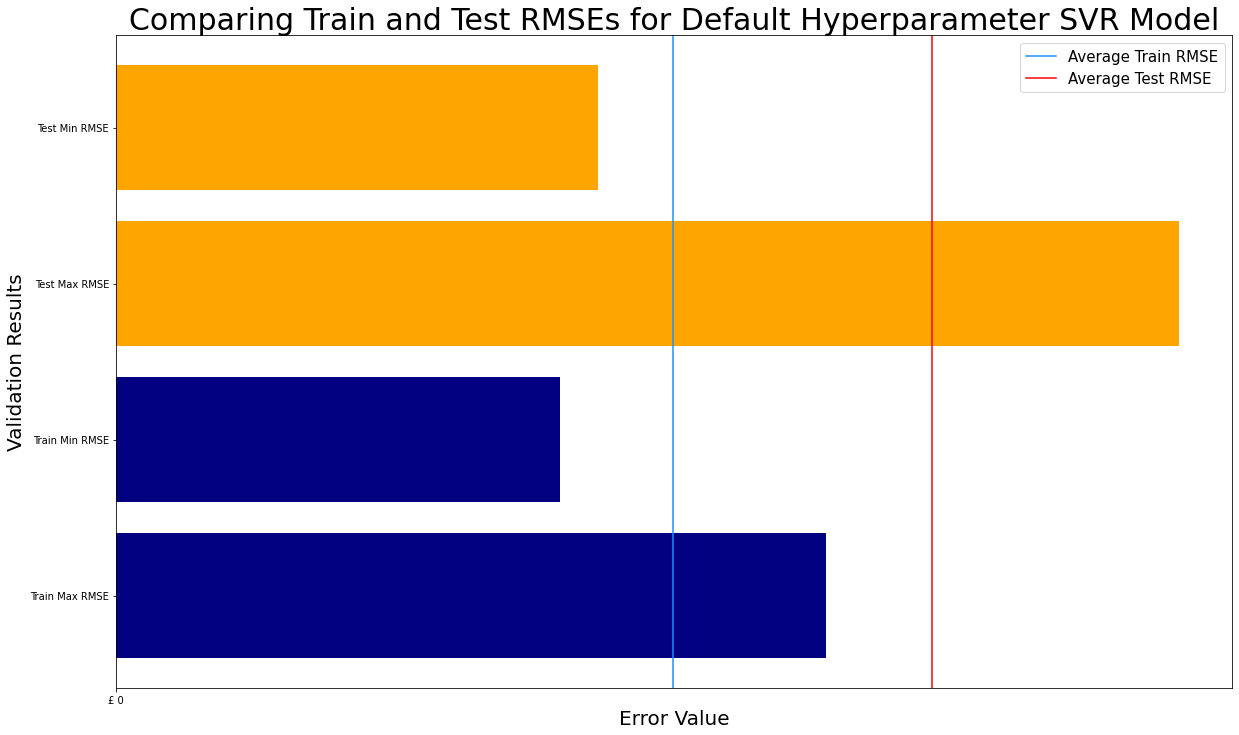

In [20]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter SVR Model',fontsize=30)
ax.legend(fontsize=15);

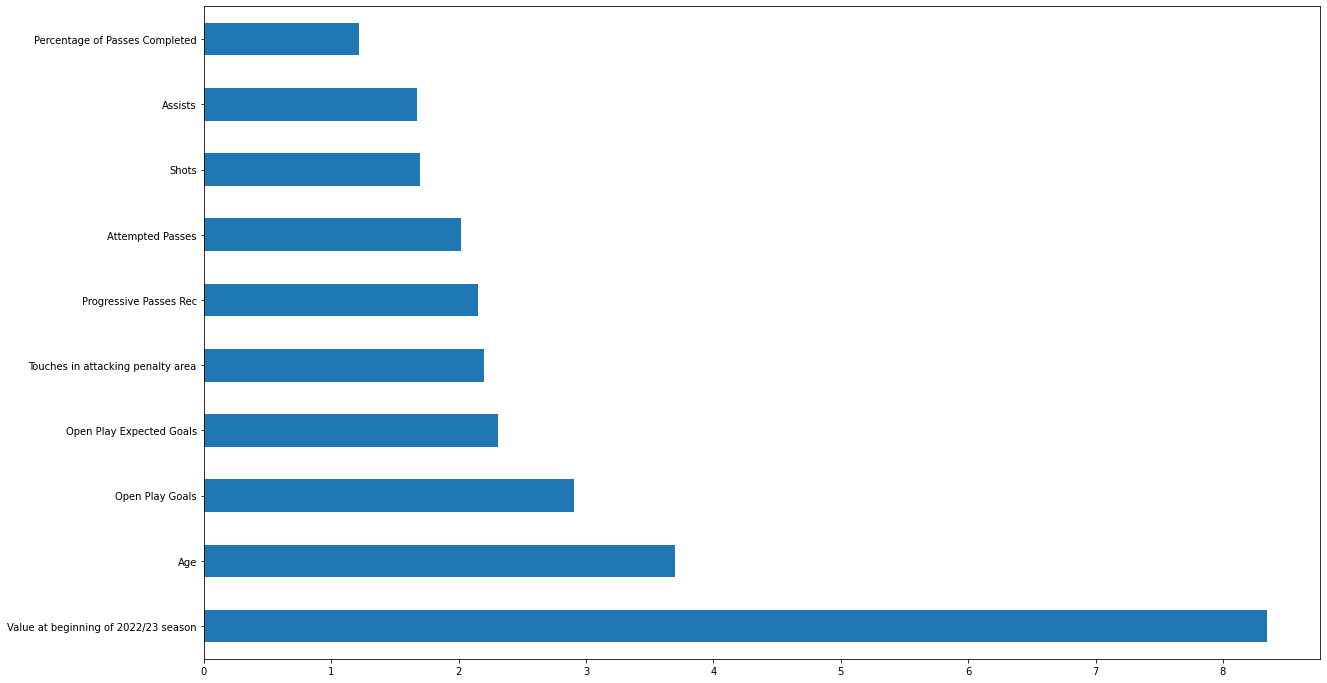

In [21]:

fig,ax = plt.subplots(figsize=(20,12))

pd.Series(abs(svr.coef_[0]), index=X_train.columns).nlargest(10).plot(kind='barh');


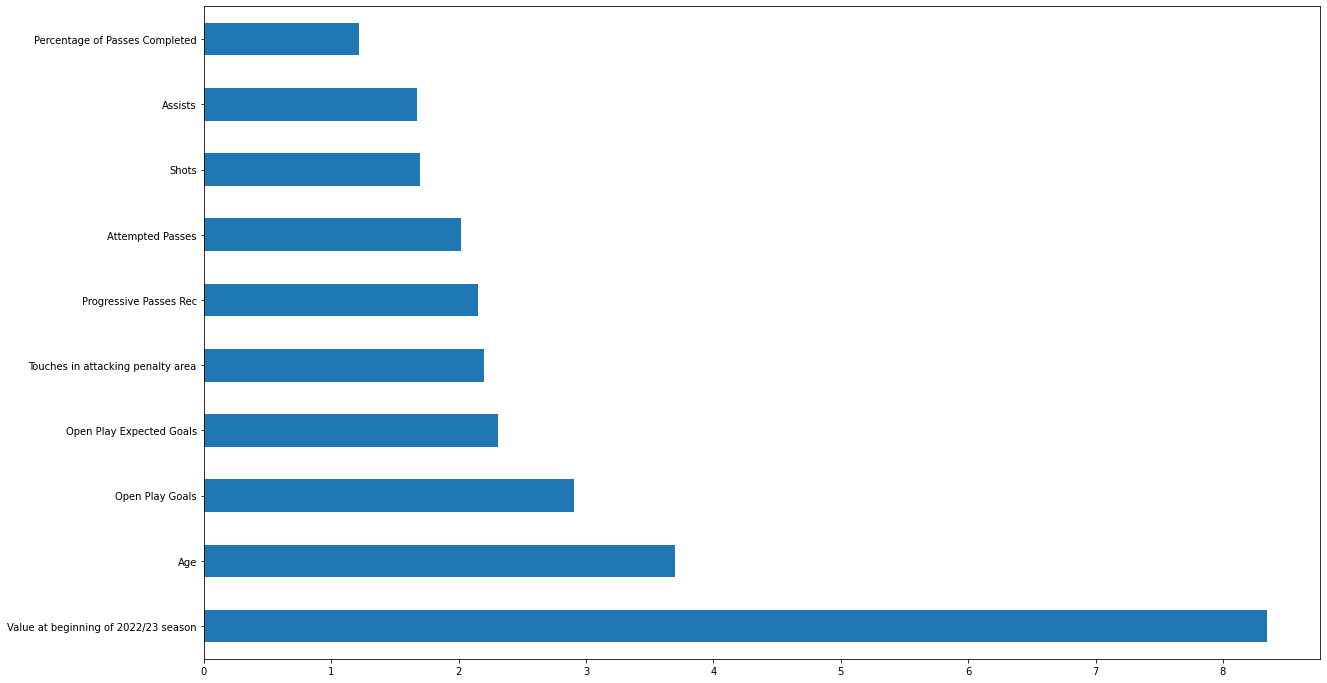

In [22]:
fig,ax = plt.subplots(figsize=(20,12))

pd.Series(abs(svr.coef_[0]), index=X_test.columns).nlargest(10).plot(kind='barh');


In [23]:
#Creating a list of top features for train data
top_features_train = list(pd.Series(abs(svr.coef_[0]), index=X_train.columns).nlargest(10).keys())

In [24]:
#Creating a list of top features for test data
top_features_test = list(pd.Series(abs(svr.coef_[0]), index=X_test.columns).nlargest(10).keys())

In [26]:
X_train = train_data.drop(['Name','Country','Value at beginning of 2023/24 season'],axis=1)[top_features_train]
y_train=train_data['Value at beginning of 2023/24 season']
X_test = test_data.drop(['Country'],axis=1)[top_features_test]
y_test=train_data['Value at beginning of 2023/24 season']
np.random.seed(42)  # For reproducibility
y_test = y_test.sample(n=409, random_state=42)

In [27]:
#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

In [28]:
# Create the parameter grid based on the results of random search 
parameters = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [33]:
# Traning model with all features using best SVR Hyperparameters
svr_Grid = SVR(C = 1000,
              degree = 1,
              gamma = 0.1,
              kernel='rbf')

svr_Grid.fit(X_train_scaled,y_train);

In [34]:
cross_val_train = cross_val_score(svr_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

In [35]:
#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

/tmp/ipykernel_441/511037645.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_max = results_att.iloc[0][2]
/tmp/ipykernel_441/511037645.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_min = results_att.iloc[0][3]
/tmp/ipykernel_441/511037645.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_max = results_att.iloc[1][2]
/tmp/ipykernel_441/511037645.py:20: FutureWarning: Series.__getitem__ treating keys as 

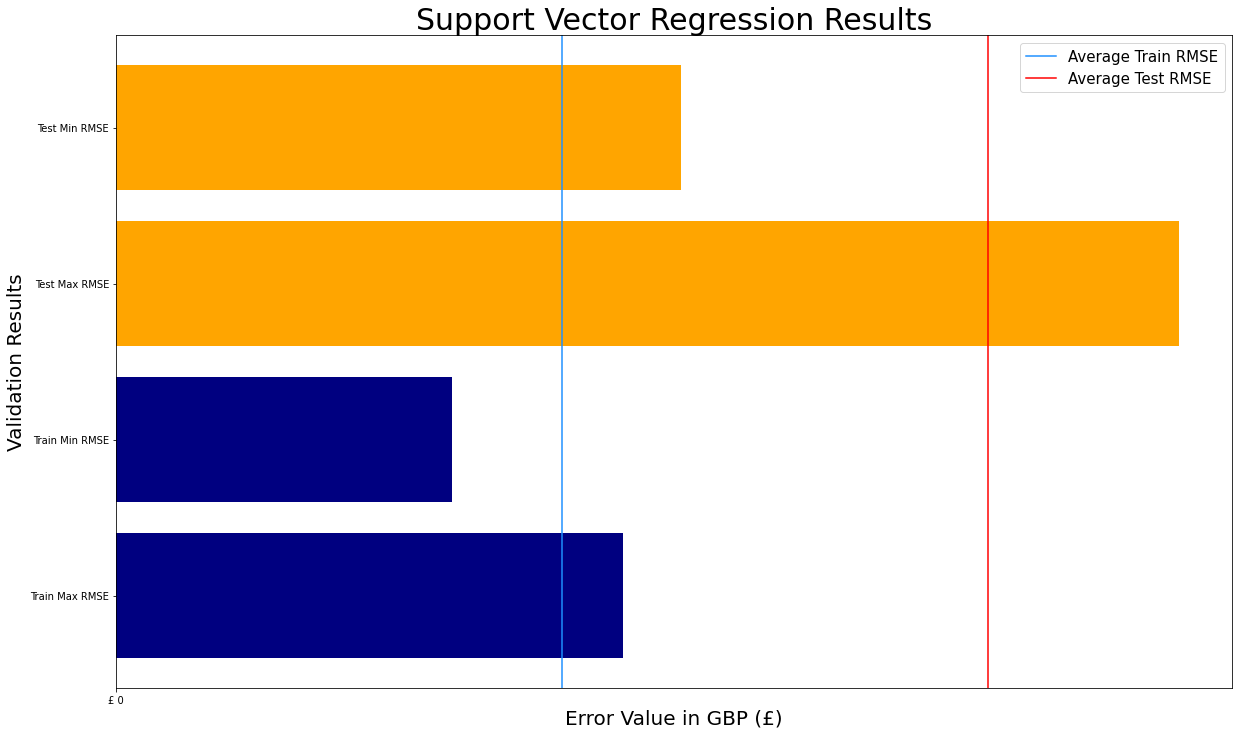

In [36]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,int(max(results_att['Max RMSE'])+1000000),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_att.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_att.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_att.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_att.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_att.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_att.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Support Vector Regression Results',fontsize=30)
ax.legend(fontsize=15);

In [37]:

results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,11.48,13.05,8.63
1,Test,22.44,27.34,14.52


In [38]:
y_pred=svr_Grid.predict(X_test_scaled)
# Add the predicted labels to the test dataframe
test_data['label'] = y_pred
# Save the test dataframe with predictions to a CSV file
test_data.to_csv('Value prediction.csv', index=False)

In [39]:
selected_columns = test_data[['id', 'label']]

# Specify the path where you want to save the CSV file
csv_file_path = "Value prediction_grid.csv"

# Save the selected columns to a CSV file
selected_columns.to_csv(csv_file_path, index=False)

In [40]:
y_test

351       3.5
486      12.0
599     150.0
442      15.0
270       8.0
        ...  
136       3.0
310      25.0
1078      5.0
532       5.0
411       1.0
Name: Value at beginning of 2023/24 season, Length: 409, dtype: float64

In [44]:
from sklearn.metrics import mean_squared_error, r2_score,cla
print("R2 Score: ", r2_score(y_test,y_pred))


R2 Score:  -0.42110707992265817
